In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import catboost
from catboost import CatBoostClassifier
import xgboost as xgb

In [4]:
df=pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')

In [5]:
df_test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

In [6]:
df1 = df

In [7]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [8]:
df.describe()


,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [9]:
dfs=df.isnull()
dfs.describe()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034,165034,165034,165034,165034,165034,165034,165034,165034,165034,165034,165034,165034,165034
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,165034,165034,165034,165034,165034,165034,165034,165034,165034,165034,165034,165034,165034,165034


In [10]:
df.drop(columns=["Surname","CustomerId"], inplace=True)

In [11]:
df_test.drop(columns=["Surname","CustomerId"], inplace=True)

In [12]:
df_test.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [13]:
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'])

In [14]:
df_test_encoded = pd.get_dummies(df_test, columns=['Geography', 'Gender'])

In [15]:
df_encoded = df_encoded.astype(int)

In [16]:
df_test_encoded = df_test_encoded.astype(int)

In [17]:
df_encoded.head()

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0,668,33,3,0,2,1,0,181449,0,1,0,0,0,1
1,1,627,33,1,0,2,1,1,49503,0,1,0,0,0,1
2,2,678,40,10,0,2,1,0,184866,0,1,0,0,0,1
3,3,581,34,2,148882,1,1,1,84560,0,1,0,0,0,1
4,4,716,33,5,0,2,1,1,15068,0,0,0,1,0,1


In [18]:
df_encoded.describe()

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,165034.0000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,656.454373,38.125883,5.020353,55477.860556,1.554455,0.753954,0.497770,112574.324436,0.211599,0.570882,0.209690,0.219428,0.435571,0.564429
std,47641.3565,80.103340,8.867207,2.806159,62817.425547,0.547154,0.430707,0.499997,50292.865280,0.408443,0.494952,0.407089,0.413860,0.495833,0.495833
min,0.0000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41258.2500,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,82516.5000,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,123774.7500,710.000000,42.000000,7.000000,119939.000000,2.000000,1.000000,1.000000,155152.250000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,165033.0000,850.000000,92.000000,10.000000,250898.000000,4.000000,1.000000,1.000000,199992.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df_encoded["HasCrCard"].value_counts()

HasCrCard
1    124428
0     40606
Name: count, dtype: int64

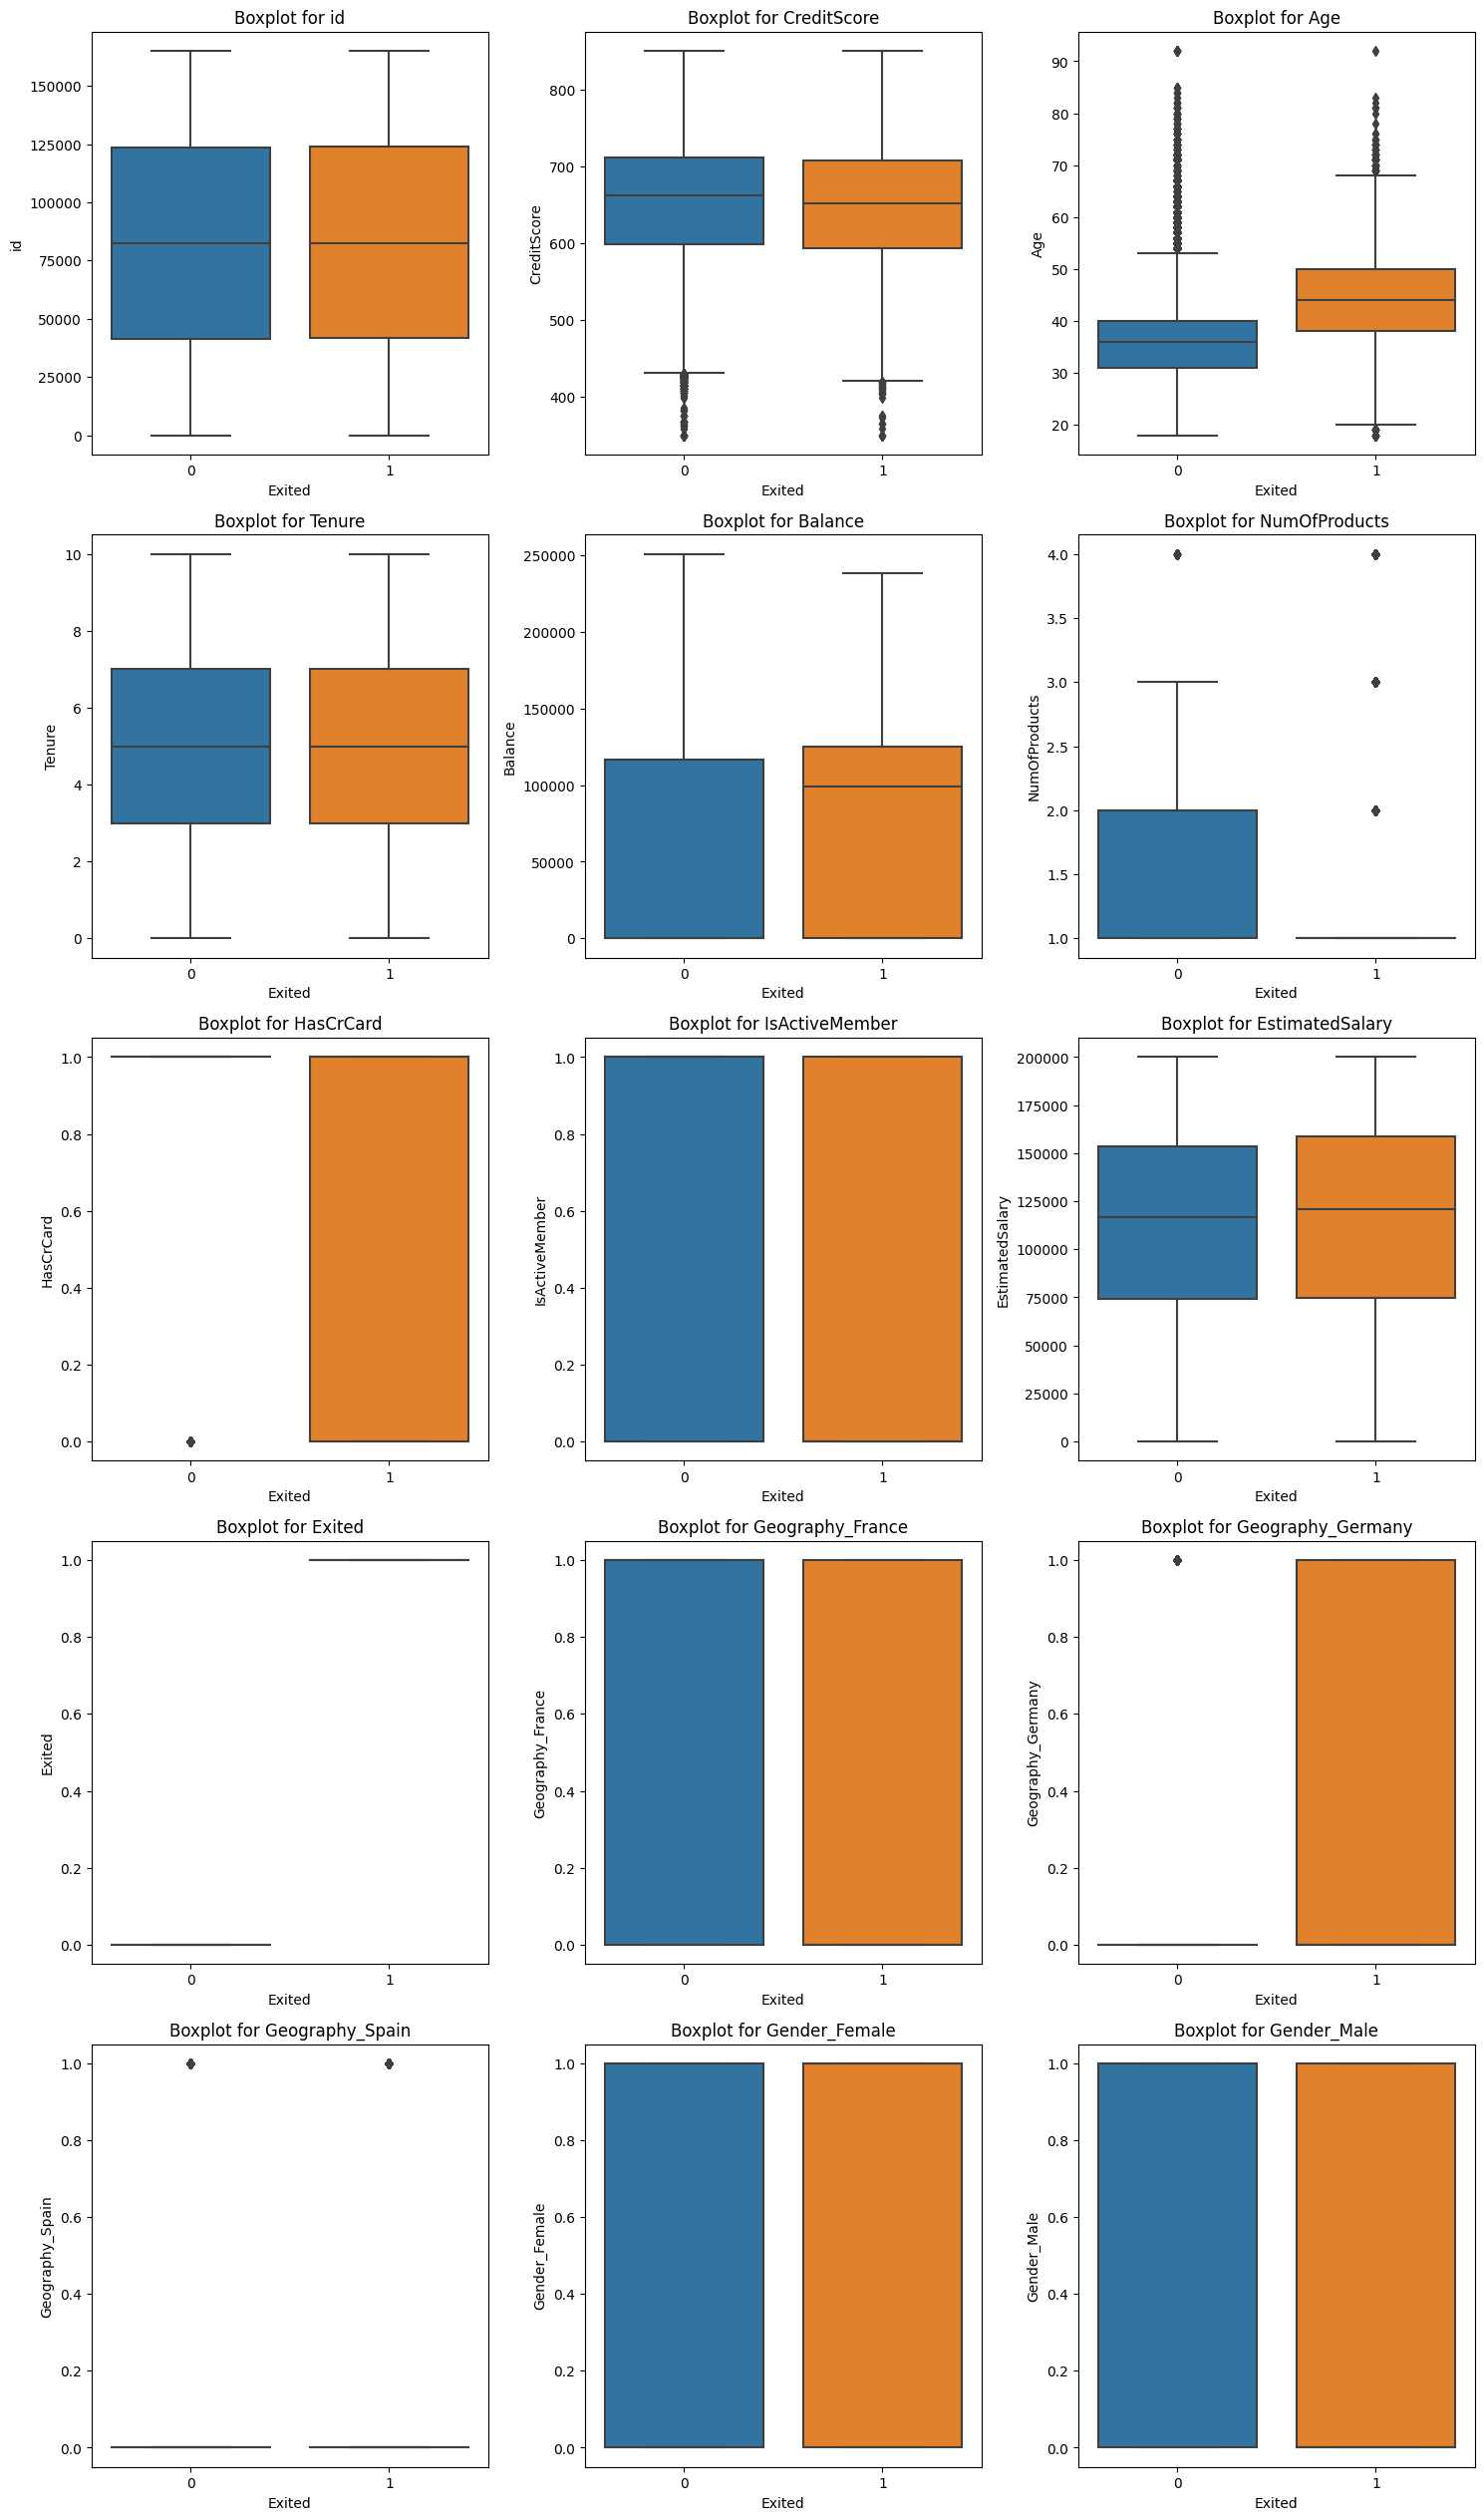

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Select numeric columns for boxplots
numeric_columns = df_encoded.select_dtypes(include='number').columns

# Create boxplots using Seaborn
plt.figure(figsize=(15, 30))
for i, column in enumerate(numeric_columns, 1):
    #if(column == 'Tenure'): continue
    plt.subplot(6, 3, i)  # Adjust the subplot grid based on the number of numeric columns
    sns.boxplot(x='Exited', y=column, data=df_encoded)
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

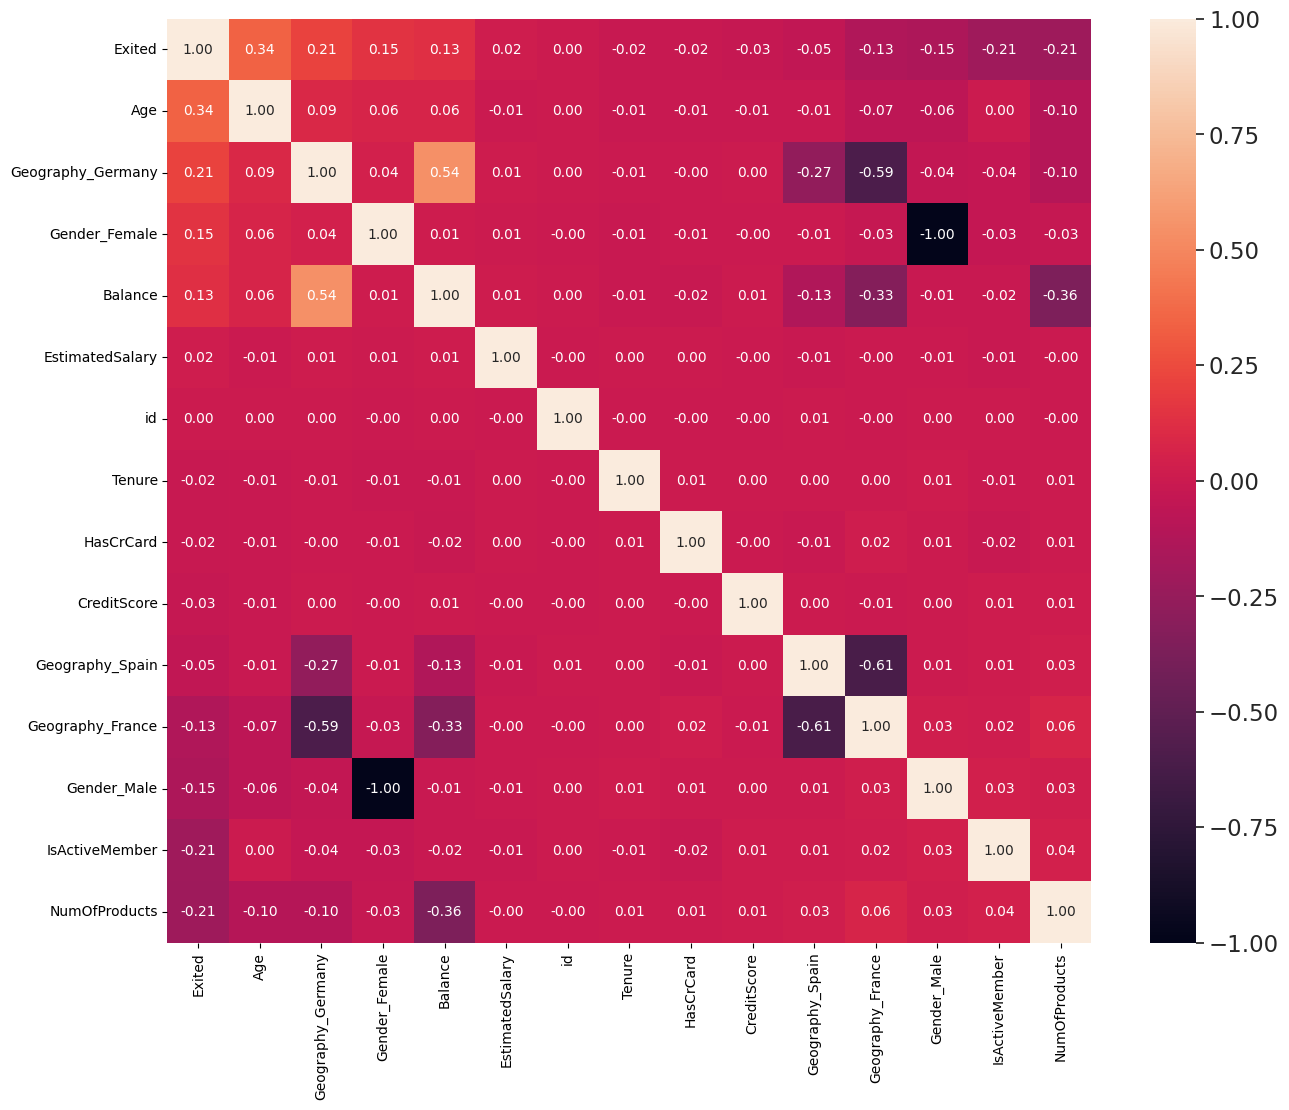

In [21]:
corrmat = df_encoded.corr()
f, ax = plt.subplots(figsize=(15, 12))
cols = corrmat.nlargest(15, 'Exited')['Exited'].index
cm = np.corrcoef(df_encoded[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()


Text(0.5, 0.98, 'Relation between target and features')

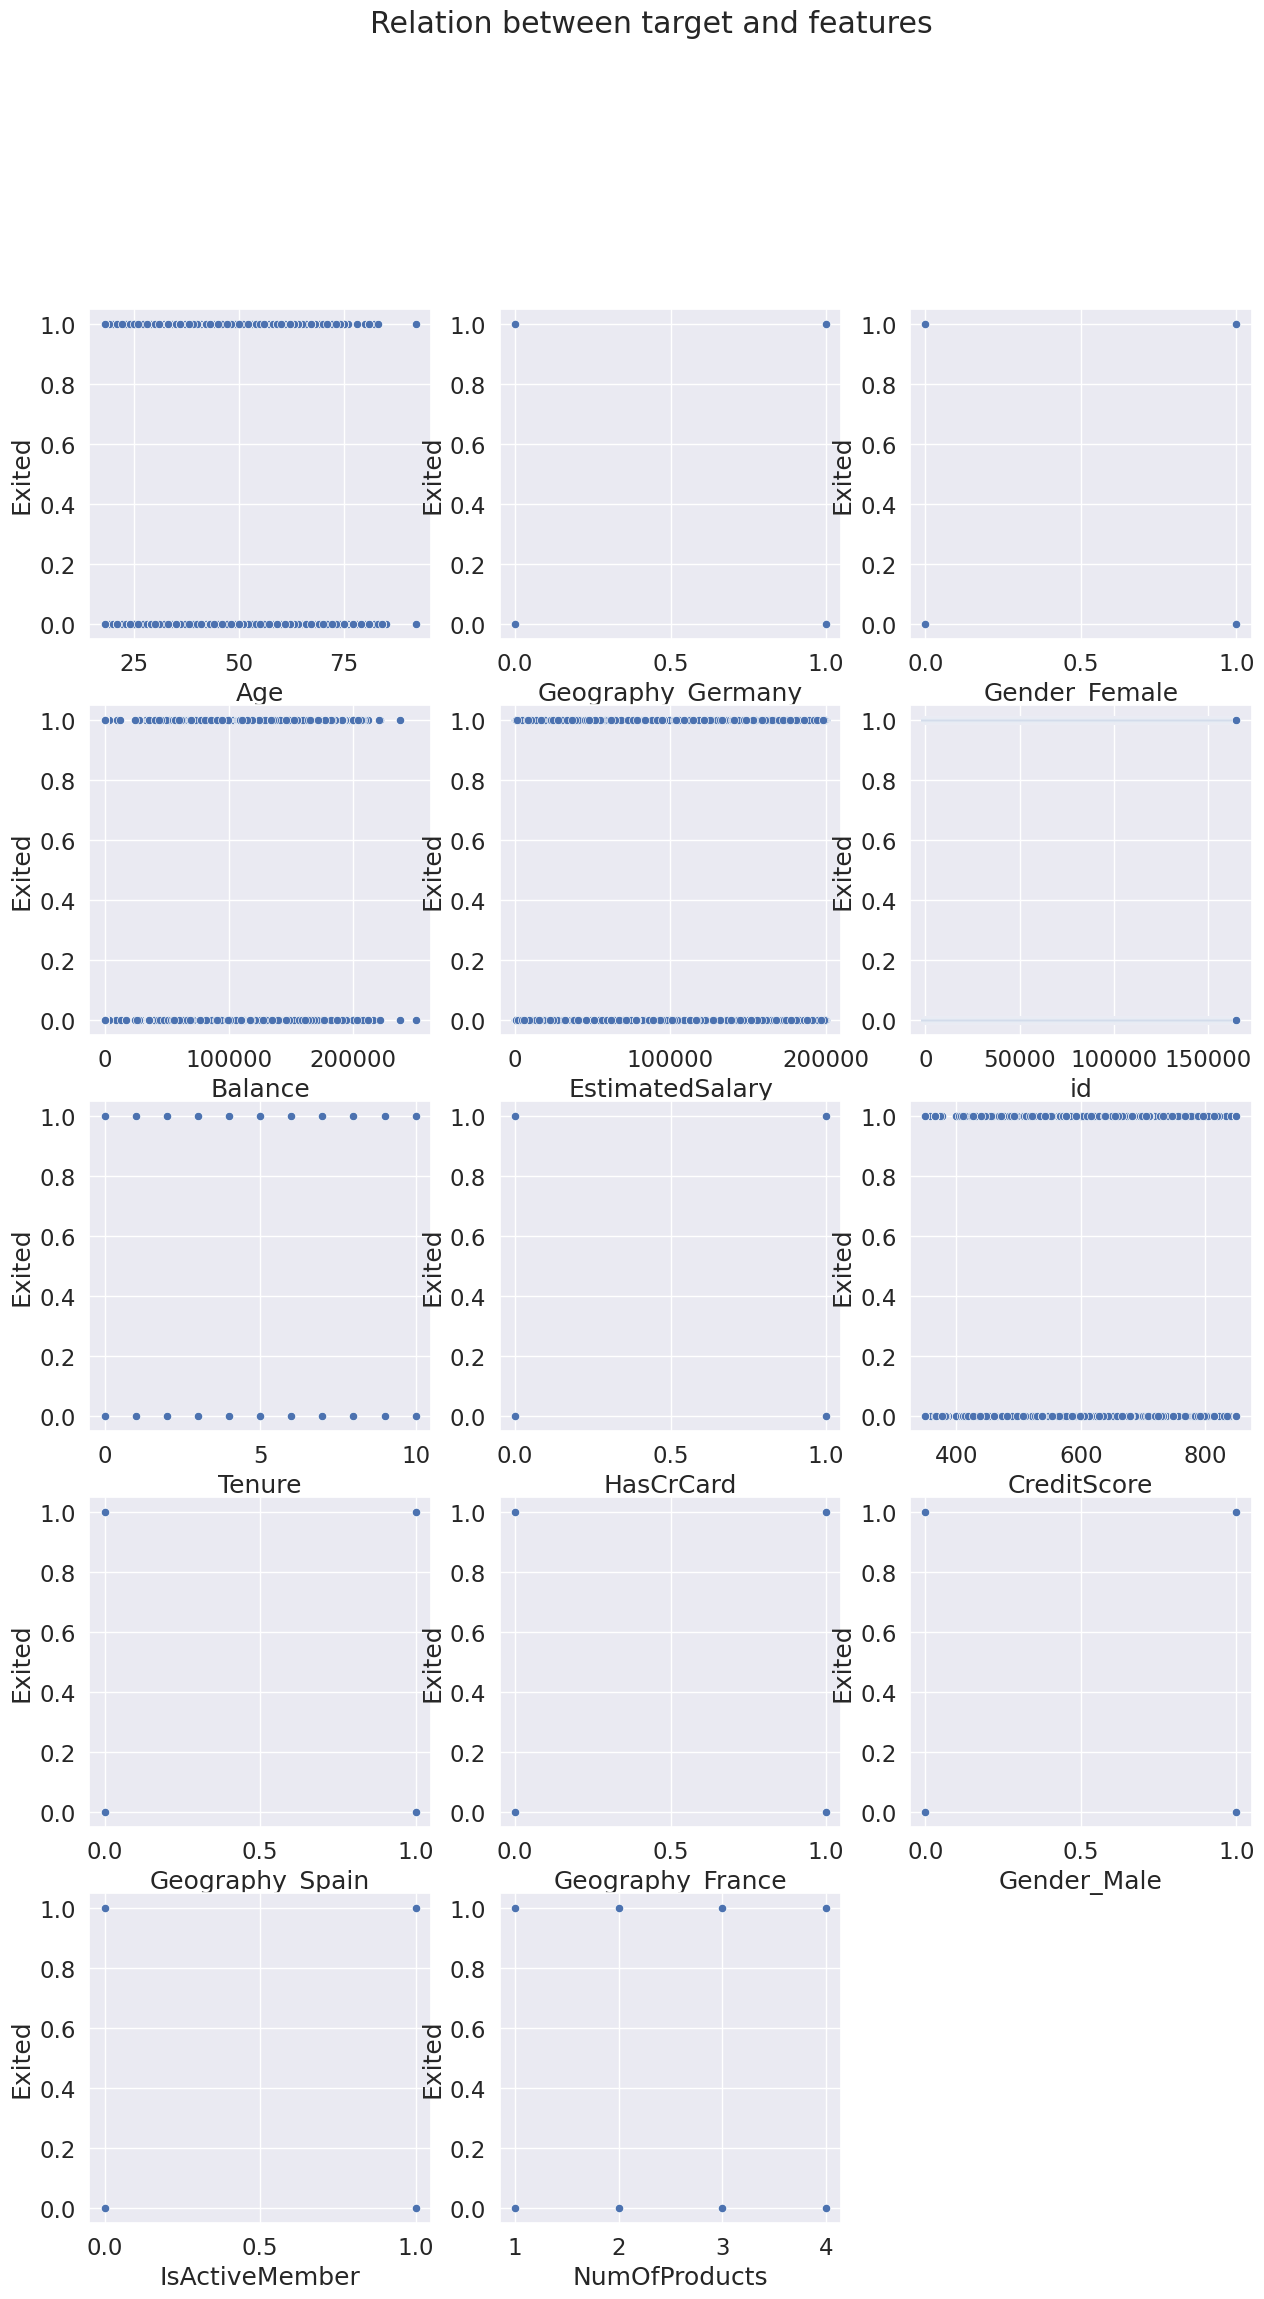

In [22]:
cols = cols[1:]
cols
plt.figure(figsize=(15,30))
for i in range(len(cols)):
    #if(i == 6): continue
    plt.subplot(6,3, i+1) #the figure has 3 row, 3 columns, and this plot is the i-th plot.
    sns.scatterplot(x=df_encoded[cols[i]], y=df_encoded['Exited'])
plt.suptitle('Relation between target and features')


Text(0.5, 0.98, 'Values for features')

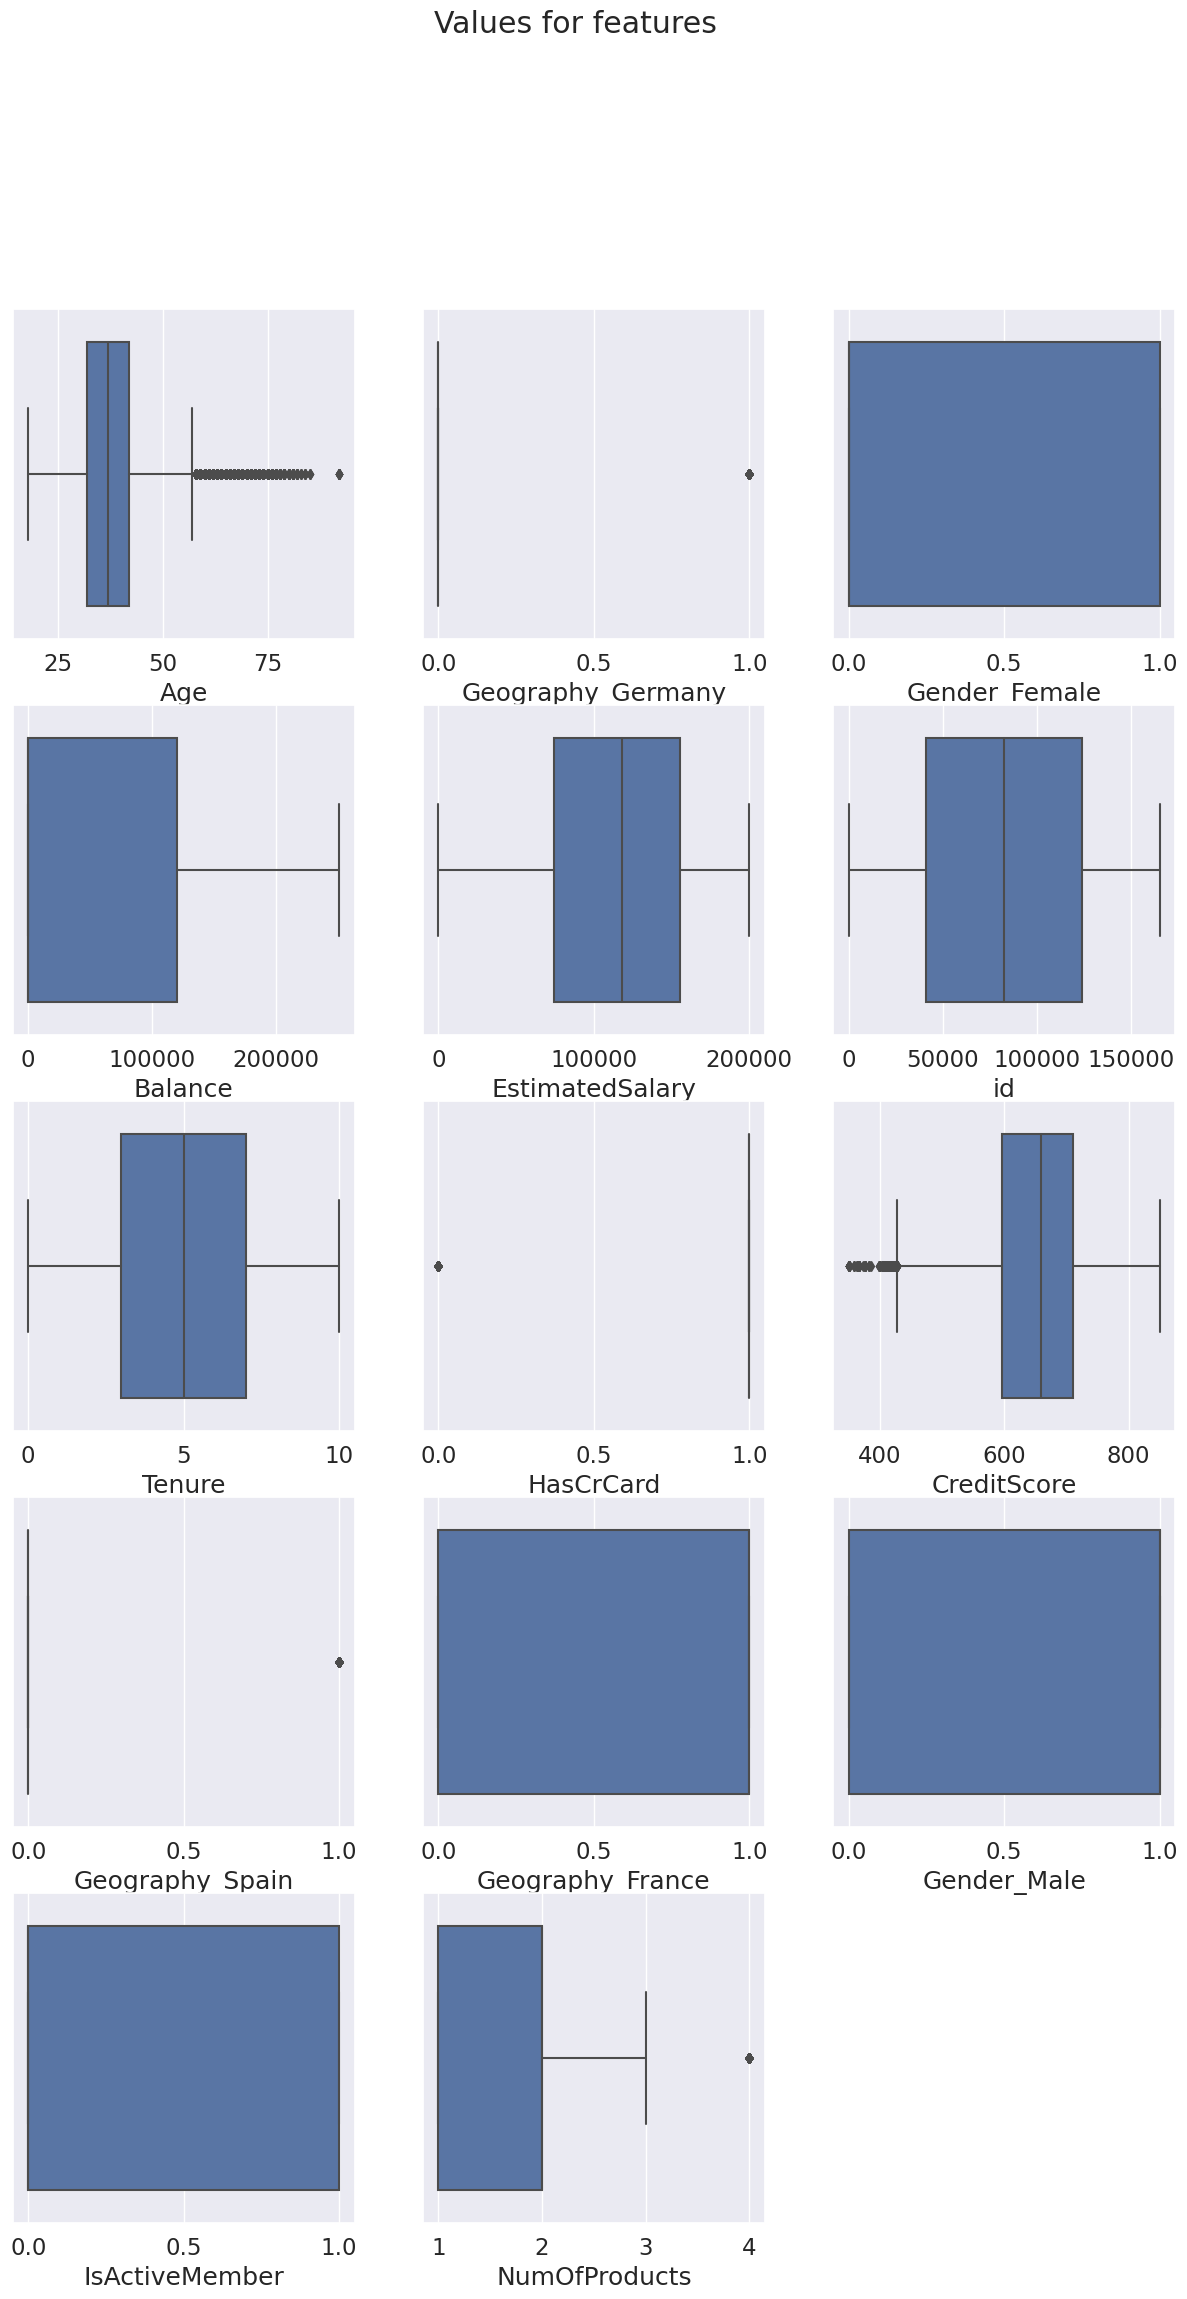

In [23]:
plt.figure(figsize=(15,30))
for i in range(len(cols)):
    plt.subplot(6,3, i+1) #the figure has 3 row, 3 columns, and this plot is the i-th plot.
    sns.boxplot(x=df_encoded[cols[i]])
plt.suptitle('Values for features')


In [24]:
num_of_products_4_exited_1 = len(df_encoded[(df_encoded['NumOfProducts'] == 4) & (df_encoded['Exited'] == 1)])
num_of_products_4_not_exited = len(df_encoded[(df_encoded['NumOfProducts'] == 4) & (df_encoded['Exited'] == 0)])

print("Number of observations with NumOfProducts=4 and Exited=1:", num_of_products_4_exited_1)
print("Number of observations with NumOfProducts=4 and Exited=0:", num_of_products_4_not_exited)

Number of observations with NumOfProducts=4 and Exited=1: 416
Number of observations with NumOfProducts=4 and Exited=0: 59


In [25]:
df_encoded['Exited'].sum()

34921

In [26]:
len(df_encoded)-df_encoded['Exited'].sum()

130113

In [27]:
df_majority_0 = df_encoded[(df_encoded['Exited']==0)] 
df_minority_1 = df_encoded[(df_encoded['Exited']==1)] 

df_minority_upsampled = resample(df_minority_1, 
                                 replace=True,    
                                 n_samples= len(df_majority_0), 
                                 random_state=42) 

df_upsampled = pd.concat([df_minority_upsampled, df_majority_0])

In [28]:
df_upsampled.head()

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
75073,75073,489,42,7,0,1,1,1,73329,1,1,0,0,0,1
4050,4050,715,40,8,0,1,1,1,50560,1,1,0,0,0,1
53884,53884,498,32,7,108760,1,0,0,135795,1,0,1,0,1,0
29976,29976,534,39,3,0,1,0,0,25843,1,1,0,0,0,1
79862,79862,682,31,5,94263,1,1,0,168895,1,1,0,0,0,1


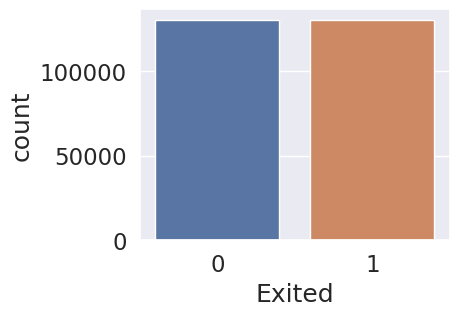

In [29]:
plt.figure(figsize=(4,3))
sns.countplot(x=df_upsampled['Exited']);

In [30]:
numeric_columns = df_upsampled.select_dtypes(include='number').columns
numeric_columns

Index(['id', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [31]:
columns_to_standardize = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform on training data
df_upsampled[columns_to_standardize] = scaler.fit_transform(df_upsampled[columns_to_standardize])

In [32]:
df_test_encoded[columns_to_standardize] = scaler.transform(df_test_encoded[columns_to_standardize])

In [33]:
df_upsampled.head()

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
75073,75073,-2.055847,0.184020,7,-0.969078,1,1,1,-0.793222,1,1,0,0,0,1
4050,4050,0.749285,-0.029448,8,-0.969078,1,1,1,-1.245352,1,1,0,0,0,1
53884,53884,-1.944138,-0.883317,7,0.751758,1,0,0,0.447181,1,0,1,0,1,0
29976,29976,-1.497303,-0.136181,3,-0.969078,1,0,0,-1.736164,1,1,0,0,0,1
79862,79862,0.339686,-0.990051,5,0.522382,1,1,0,1.104456,1,1,0,0,0,1


In [34]:
df_test_encoded.head()

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,165034,-0.851874,-1.843920,2,-0.969078,2,0,1,0.947207,1,0,0,1,0
1,165035,0.352098,0.610954,2,-0.969078,1,1,0,-0.808711,1,0,0,1,0
2,165036,0.016972,-0.669850,7,-0.969078,2,1,0,0.508480,1,0,0,1,0
3,165037,0.327274,-0.456382,8,-0.969078,1,1,0,0.013022,1,0,0,0,1
4,165038,1.208532,-0.242915,10,0.949584,1,1,0,0.519382,0,1,0,0,1


In [35]:
X = df_upsampled.drop(columns=['Exited','id'])
y = df_upsampled['Exited']

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=100)

In [37]:
X_test = df_test_encoded.drop(columns=['id'])
X_test_id = df_test_encoded['id']

In [38]:
LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(X_train, y_train)

#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel val Score is : ' , LogisticRegressionModel.score(X_val, y_val))

LogisticRegressionModel Train Score is :  0.7482226919012394
LogisticRegressionModel val Score is :  0.746128424854936


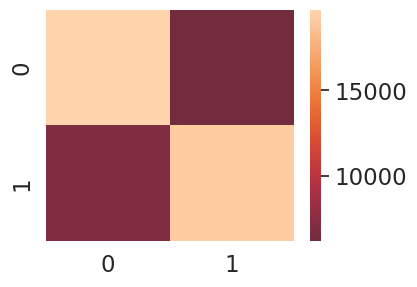

Confusion Matrix is
 [[19694  6233]
 [ 6980 19139]]


In [39]:
y_pred = LogisticRegressionModel.predict(X_val)

plt.figure(figsize=(4,3))
CM = confusion_matrix(y_val, y_pred)
sns.heatmap(CM, center=True)
plt.show()

print('Confusion Matrix is\n', CM)

In [40]:
y_test_logistic = LogisticRegressionModel.predict_proba(X_test)[:,1]

In [41]:
y_test_logistic

array([0.0851112 , 0.81035351, 0.38599063, ..., 0.18189541, 0.25430144,
       0.6112092 ])

CAT-BOOST

In [42]:
# param_grid = {
#     'iterations': [100, 200, 500],
#     'depth': [6, 8, 10],
#     'learning_rate': [0.01, 0.05, 0.1],
#     # Add more parameters as needed
# }


In [43]:
# from sklearn.model_selection import GridSearchCV

# model = CatBoostClassifier()

# # Use GridSearchCV or RandomizedSearchCV
# grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')

# # Fit the search to the training data
# grid_search.fit(X, y)


In [44]:
# # Access the best hyperparameters
# best_params = grid_search.best_params_
# print(best_params)

{'depth': 10, 'iterations': 500, 'learning_rate': 0.1}

In [45]:
# # Best hyperparameters
# best_params = {'depth': 10, 'iterations': 500, 'learning_rate': 0.1}

# # Initialize CatBoostClassifier with the best hyperparameters
# final_model = CatBoostClassifier(**best_params)

# # Fit the final model on the training data
# final_model.fit(X, y)


In [46]:

# # Get predicted probabilities on the test set

# y_test_catboost = final_model.predict_proba(X_test)[:, 1]

In [47]:
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',  # or 'error' for classification error
    booster='gbtree',
    tree_method='auto',  # or 'gpu_hist' if you have GPU support
    learning_rate=0.05,
    max_depth=6,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=10)


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67386
[10]	validation_0-logloss:0.55122
[20]	validation_0-logloss:0.49535
[30]	validation_0-logloss:0.46484
[40]	validation_0-logloss:0.44292
[50]	validation_0-logloss:0.43089
[60]	validation_0-logloss:0.42455
[70]	validation_0-logloss:0.42078
[80]	validation_0-logloss:0.41832
[90]	validation_0-logloss:0.41654
[100]	validation_0-logloss:0.41526
[110]	validation_0-logloss:0.41407
[120]	validation_0-logloss:0.41315
[130]	validation_0-logloss:0.41220
[140]	validation_0-logloss:0.41137
[150]	validation_0-logloss:0.41061
[160]	validation_0-logloss:0.40968
[170]	validation_0-logloss:0.40899
[180]	validation_0-logloss:0.40839
[190]	validation_0-logloss:0.40764
[200]	validation_0-logloss:0.40693
[210]	validation_0-logloss:0.40628
[220]	validation_0-logloss:0.40562
[230]	validation_0-logloss:0.40508
[240]	validation_0-logloss:0.40443
[250]	validation_0-logloss:0.40379
[260]	validation_0-logloss:0.40315
[270]	validation_0-logloss:0.40261
[280]	validation_0-logloss:0.40

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [48]:
y_test_xgboost = xgb_model.predict_proba(X_test)[:, 1]

In [49]:
# Assuming X_test_id and y_test are pandas Series
result_df = pd.concat([X_test_id.reset_index(drop=True), pd.Series(y_test_xgboost, name='predicted_labels')], axis=1)


In [50]:
result_df.head(10)

,id,predicted_labels
0,165034,0.071229
1,165035,0.943440
2,165036,0.075635
3,165037,0.542155
4,165038,0.640256
5,165039,0.103671
6,165040,0.149084
7,165041,0.240130
8,165042,0.861549
9,165043,0.040369


In [51]:
# Save the submission DataFrame to a CSV file
result_df.to_csv('submission.csv', index=False)
